# Supervised Learning - Foundations Project: ReCell

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. 
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

### Let us start by importing necessary libraries and data

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

In [3]:
# loading data
data = pd.read_csv(r'C:\Users\ryass.DESKTOP-0A1NS33\OneDrive\GreatLearning_DSBA\supervised_learning_foundation\project\used_device_data.csv') ## Complete the code to read the data

<IPython.core.display.Javascript object>

### Data Overview

In [4]:
# checking shape of the data
data.shape ## Complete the code to get the shape of data

(3454, 15)

<IPython.core.display.Javascript object>

In [5]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,4.038832,5.190788
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,2.800325,3.884652
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,4.370713,4.487287
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,4.677863,5.639422
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,4.517650,5.300415
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,4.645640,5.634325
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,3.764451,4.244344
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,4.422809,5.799820
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,4.959412,6.040659
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,4.227855,4.879007


<IPython.core.display.Javascript object>

In [6]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [7]:
# checking the column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

In [8]:
# checking for duplicate values
df.duplicated().any() ## Complete the code to check duplicate entries in the data

False

<IPython.core.display.Javascript object>

In [9]:
# checking for missing values in the data
df.isna().sum().sort_values(ascending=False) ## Complete the code to check the missing values in the data

main_camera_mp           179
weight                     7
battery                    6
ram                        4
int_memory                 4
selfie_camera_mp           2
normalized_new_price       0
normalized_used_price      0
days_used                  0
release_year               0
5g                         0
4g                         0
screen_size                0
os                         0
brand_name                 0
dtype: int64

<IPython.core.display.Javascript object>

**Let's check the statistical summary of the data.**

In [10]:
df.describe(include='all').T ## Complete the code to print the statistical summary of the data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454,NaN,NaN,NaN,13.7131,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275,NaN,NaN,NaN,9.46021,4.81546,0.08,5,8,13,48
selfie_camera_mp,3452,NaN,NaN,NaN,6.55423,6.97037,0,2,5,8,32
int_memory,3450,NaN,NaN,NaN,54.5731,84.9724,0.01,16,32,64,1024
ram,3450,NaN,NaN,NaN,4.03612,1.3651,0.02,4,4,4,12
battery,3448,NaN,NaN,NaN,3133.4,1299.68,500,2100,3000,4000,9720


<IPython.core.display.Javascript object>

## Exploratory Data Analysis

### Univariate Analysis

In [197]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    sns.set_palette('rainbow')
    sns.set_context('talk')#poster
    sns.set_style("whitegrid", {"grid.color": ".2", "grid.linestyle": ":"})
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, palette="winter",
    )  # boxplot will be created and a star will indicate the mean value of the column
    #sns.swarmplot(data=data,x=feature, ax=ax_box2, palette="hot" )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    f2.savefig(f'{feature}_hist_box')

<IPython.core.display.Javascript object>

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    sns.set(style='whitegrid', context='poster', palette='rainbow')
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        fig=plt.figure(figsize=(count + 1, 5))
    else:
        fig=plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="cool",
        order=data[feature].value_counts(normalize=True).index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=14,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
    fig.savefig(feature +'_bars.png')

<IPython.core.display.Javascript object>

In [13]:
new_columns=[' '.join(i).title() for i in df.columns.str.split('_')]
df.columns=new_columns
df.columns

Index(['Brand Name', 'Os', 'Screen Size', '4G', '5G', 'Main Camera Mp',
       'Selfie Camera Mp', 'Int Memory', 'Ram', 'Battery', 'Weight',
       'Release Year', 'Days Used', 'Normalized Used Price',
       'Normalized New Price'],
      dtype='object')

<IPython.core.display.Javascript object>

**`normalized_used_price`**

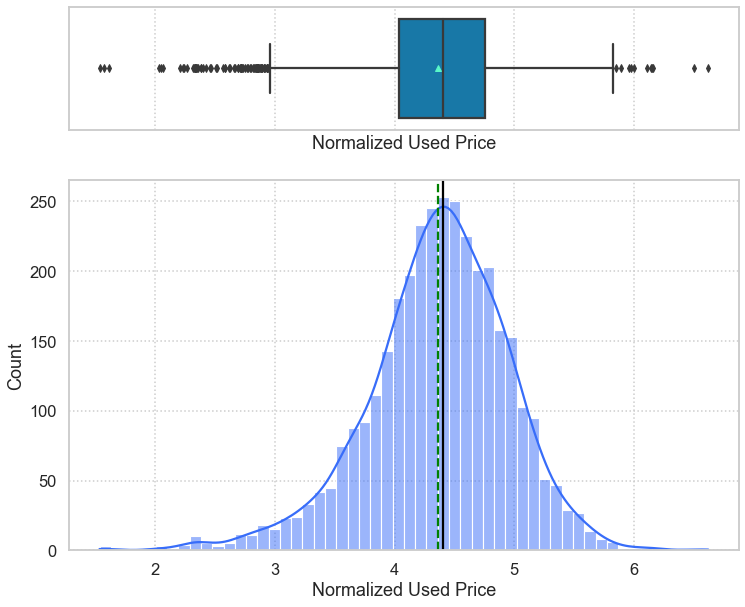

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(df, "Normalized Used Price")

**`normalized_new_price`**

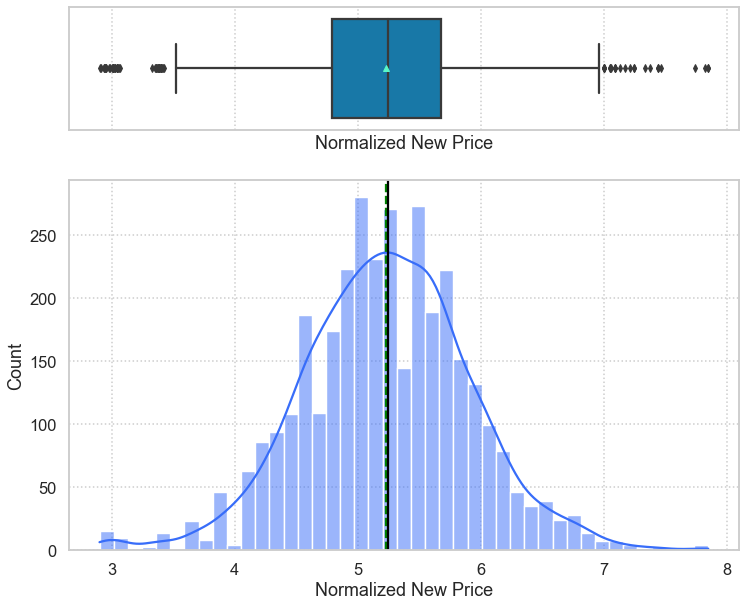

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df,'Normalized New Price')  ## Complete the code to create histogram_boxplot for 'normalized_new_price'

**`screen_size`**

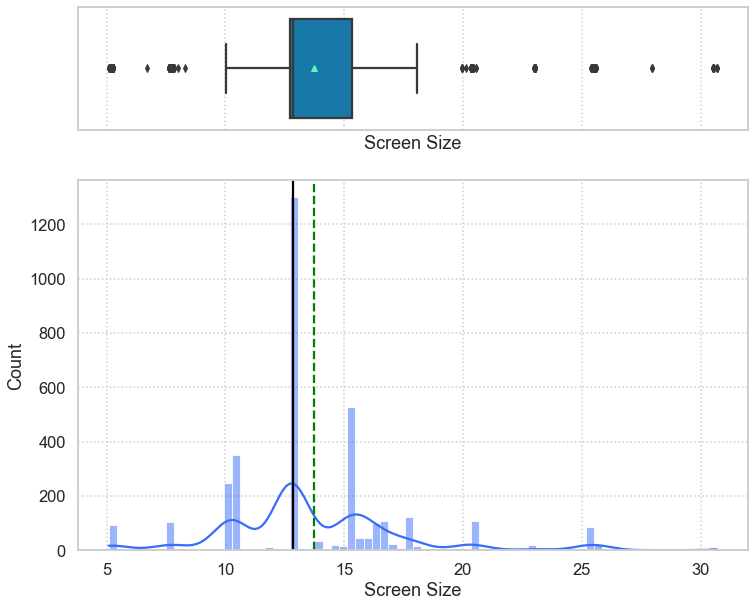

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df,'Screen Size')  ## Complete the code to create histogram_boxplot for 'screen_size'

**`main_camera_mp`**

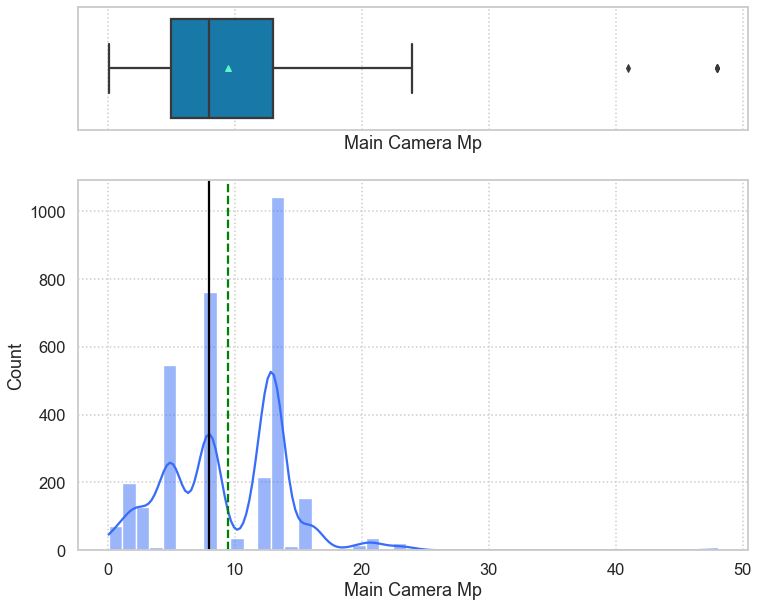

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df,'Main Camera Mp')  ## Complete the code to create histogram_boxplot for 'main_camera_mp'

**`selfie_camera_mp`**

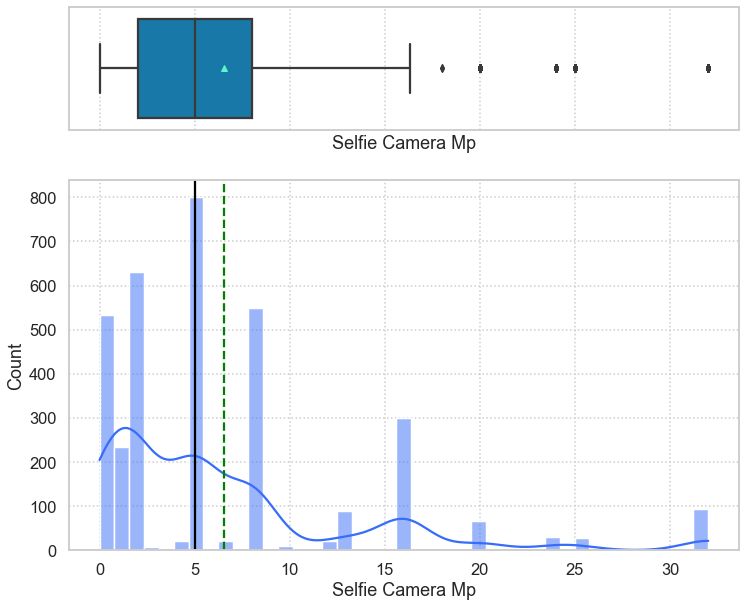

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df,'Selfie Camera Mp')  ## Complete the code to create histogram_boxplot for 'selfie_camera_mp'

**`int_memory`**

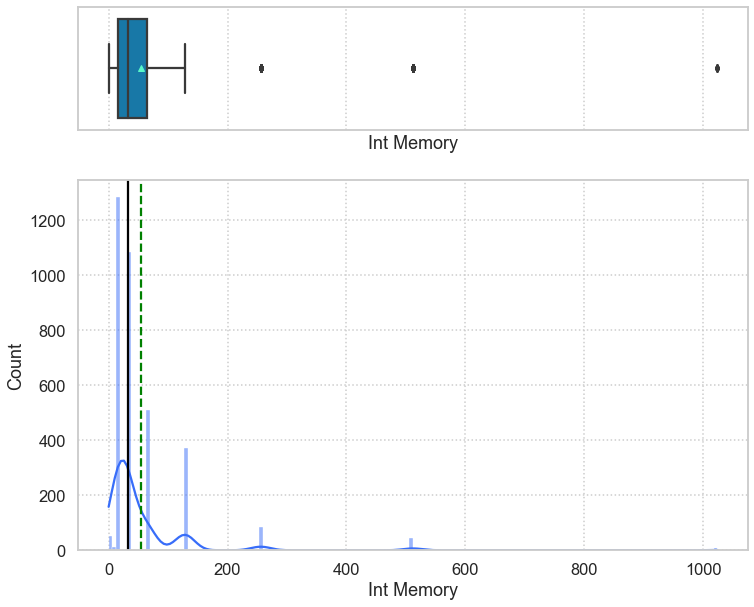

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df,'Int Memory')  ## Complete the code to create histogram_boxplot for 'int_memory'

**`ram`**

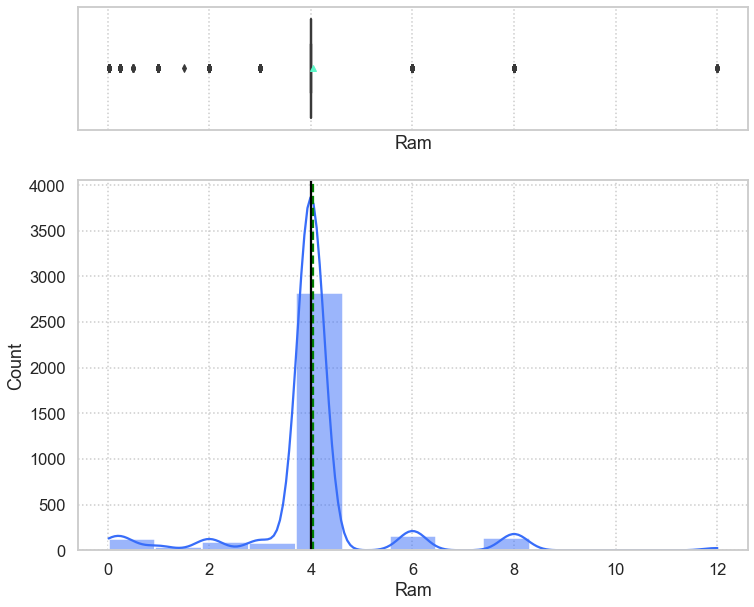

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df,'Ram')  ## Complete the code to create histogram_boxplot for 'ram'

**`weight`**

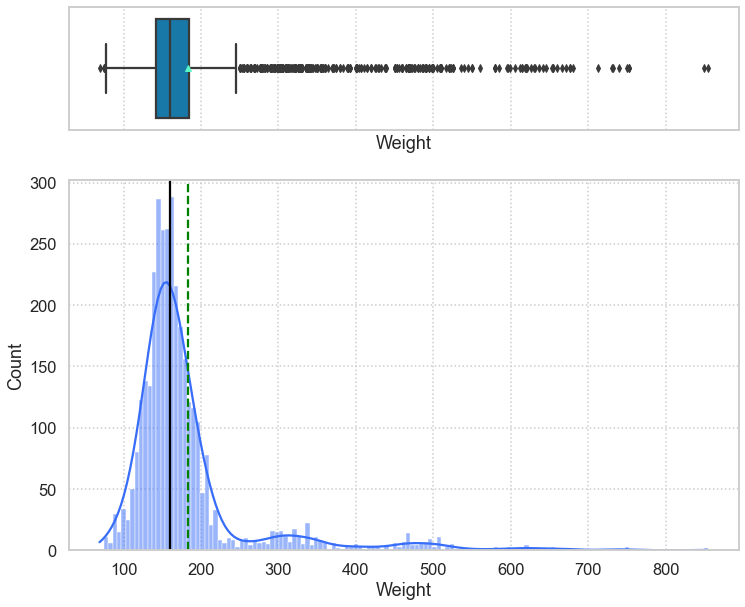

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df,'Weight')  ## Complete the code to create histogram_boxplot for 'weight'

In [22]:
# let's apply the log transform to see if we can make the distribution of weight closer to normal
df["Weight Log"] = np.log(df["Weight"])
df.drop("Weight",axis=1,inplace=True)

<IPython.core.display.Javascript object>

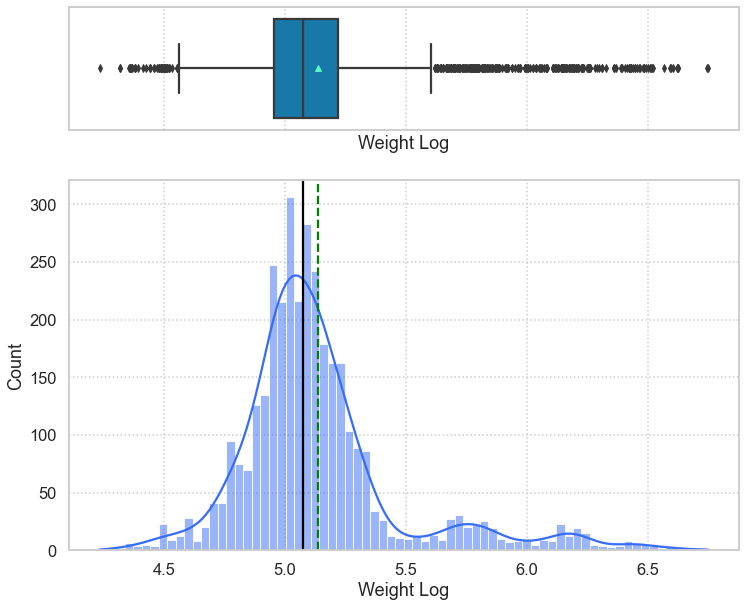

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df,'Weight Log')  ## Complete the code to create histogram_boxplot for 'weight_log'

**`battery`**

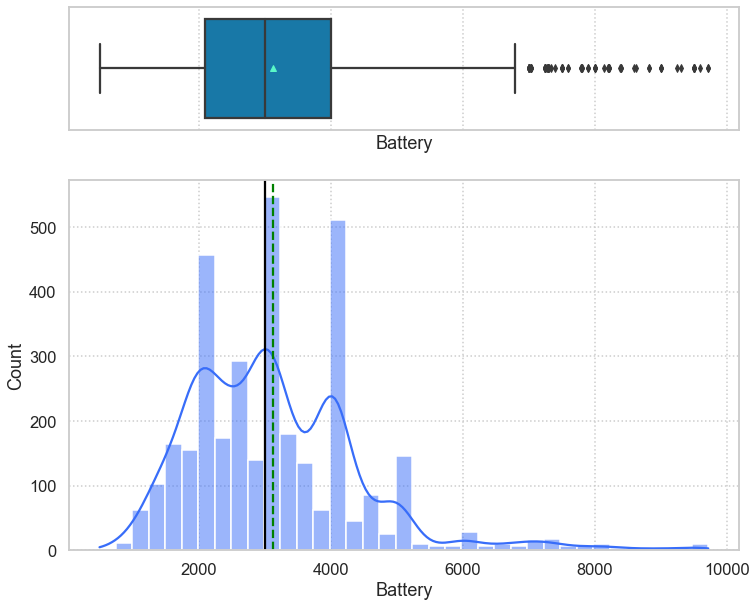

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df,'Battery')  ## Complete the code to create histogram_boxplot for 'battery'

**`days_used`**

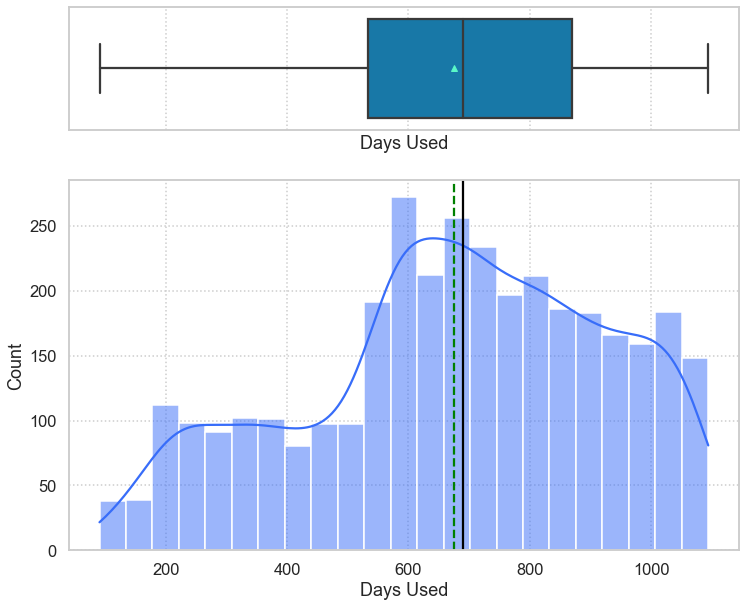

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(df,'Days Used')  ## Complete the code to create histogram_boxplot for 'days_used'

**`brand_name`**

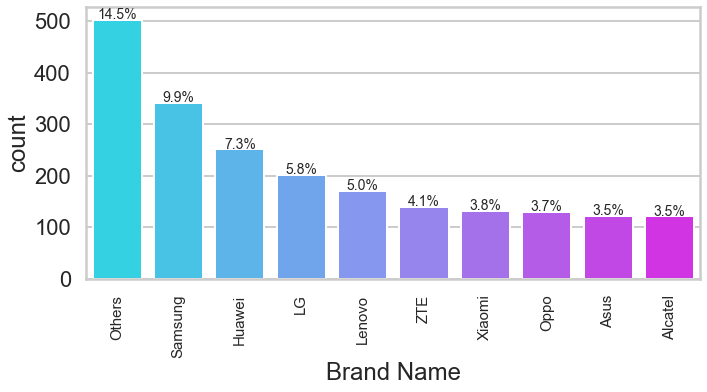

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(df, "Brand Name", perc=True, n=10)

**`os`**

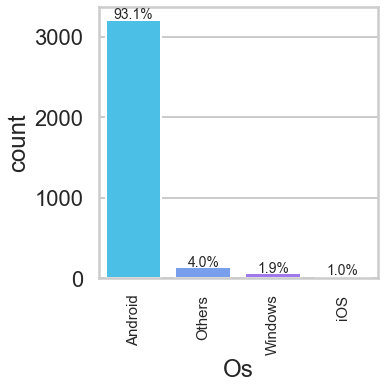

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(df,'Os') ## Complete the code to create labeled_barplot for 'os'

**`4g`**

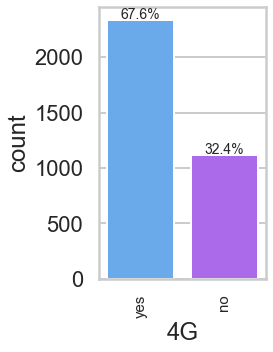

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(df,'4G') ## Complete the code to create labeled_barplot for '4g'

**`5g`**

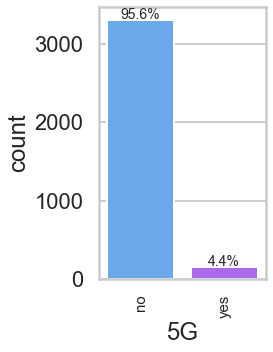

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(df,'5G') ## Complete the code to create labeled_barplot for '5g'

**`release_year`**

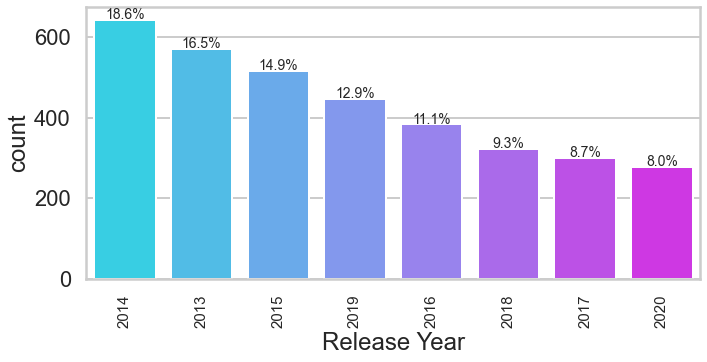

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(df,'Release Year',perc=True,n=10) ## Complete the code to create labeled_barplot for 'release_year'

### Bivariate Analysis

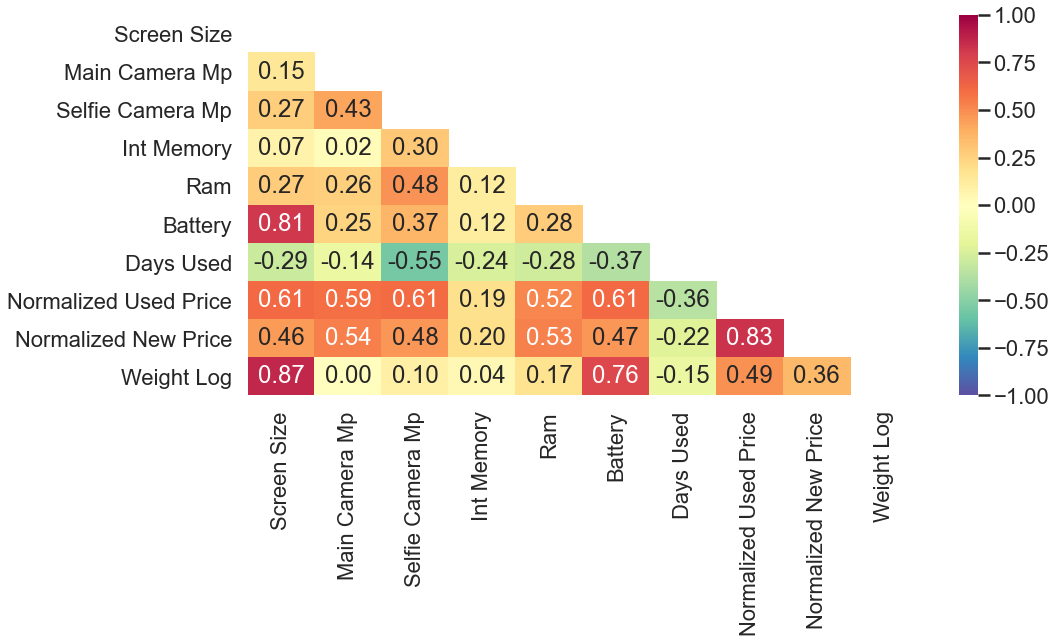

<IPython.core.display.Javascript object>

In [31]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("Release Year")
mask=np.triu(np.ones_like(
    df[cols_list].corr()))
plt.figure(figsize=(15, 7))
sns.heatmap(df[cols_list].corr(),annot=True, mask=mask, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral_r"
)
plt.show()

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

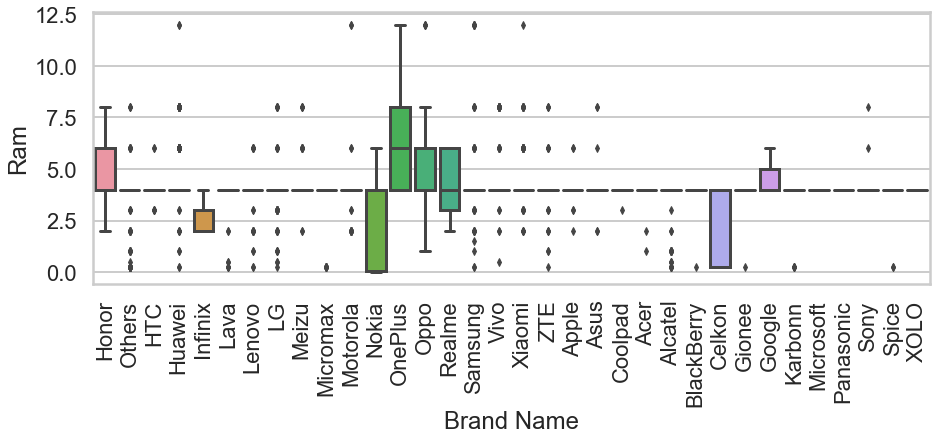

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="Brand Name", y="Ram")
plt.xticks(rotation=90)
plt.show()

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [33]:
df_large_battery = df[df.Battery > 4500]
df_large_battery.shape

(341, 15)

<IPython.core.display.Javascript object>

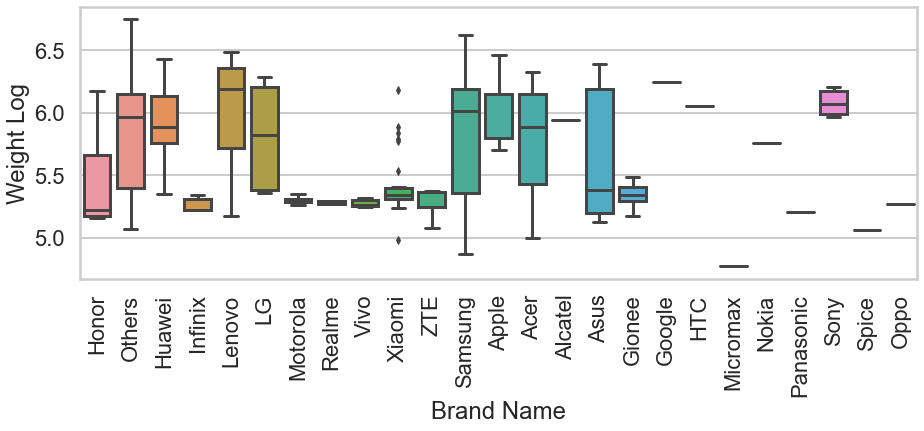

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_large_battery,x='Brand Name',y='Weight Log') ## Complete the code to create a boxplot for 'brand_name' and 'weight'
plt.xticks(rotation=90)
plt.show()

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [35]:
df_large_screen = df[df['Screen Size'] > 6 * 2.54]
df_large_screen.shape

(1099, 15)

<IPython.core.display.Javascript object>

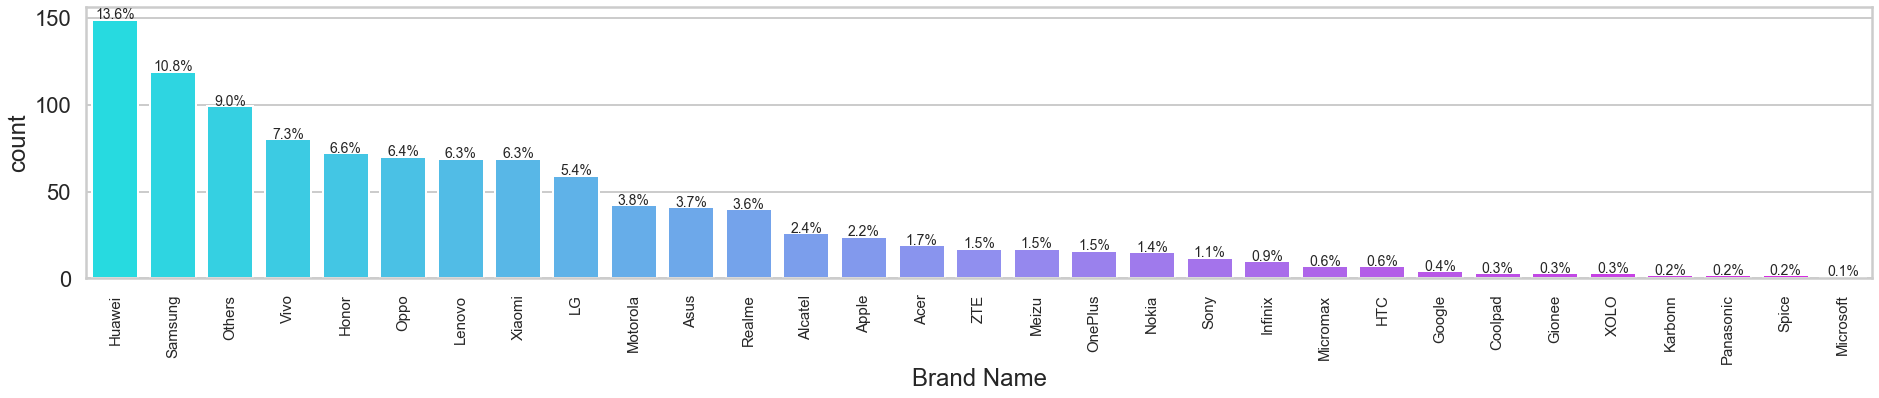

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(df_large_screen,'Brand Name') ## Complete the code to create labeled_barplot for 'brand_name' in large screen dataframe

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [37]:
df_selfie_camera = df[df['Selfie Camera Mp'] > 8]
df_selfie_camera.shape

(655, 15)

<IPython.core.display.Javascript object>

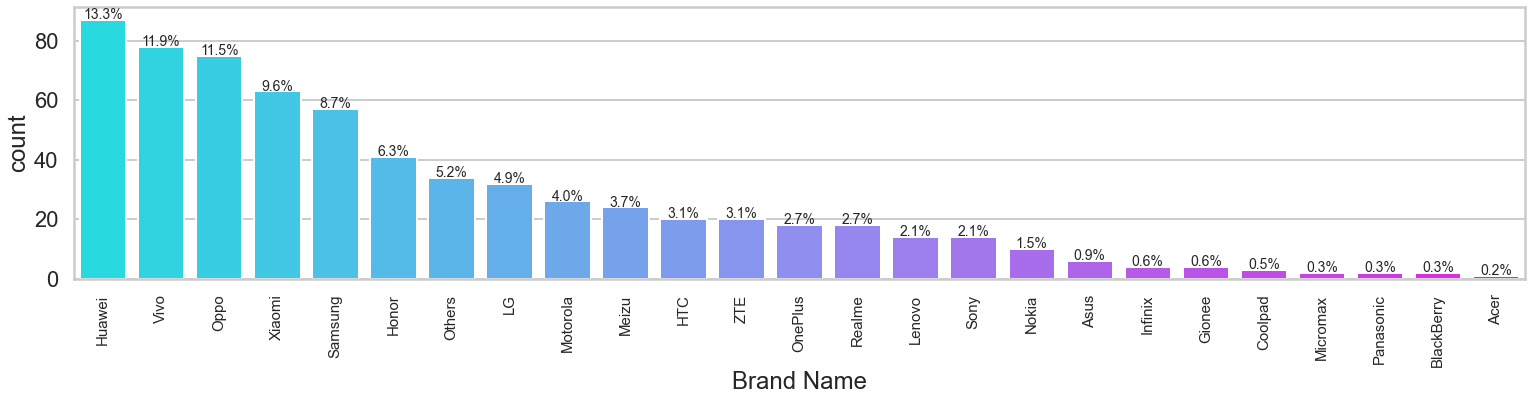

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(df_selfie_camera,'Brand Name') ## Complete the code to create labeled_barplot for 'brand_name' in high selfie camera dataframe

**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [39]:
df_main_camera = df[df['Main Camera Mp'] > 16]
df_main_camera.shape

(94, 15)

<IPython.core.display.Javascript object>

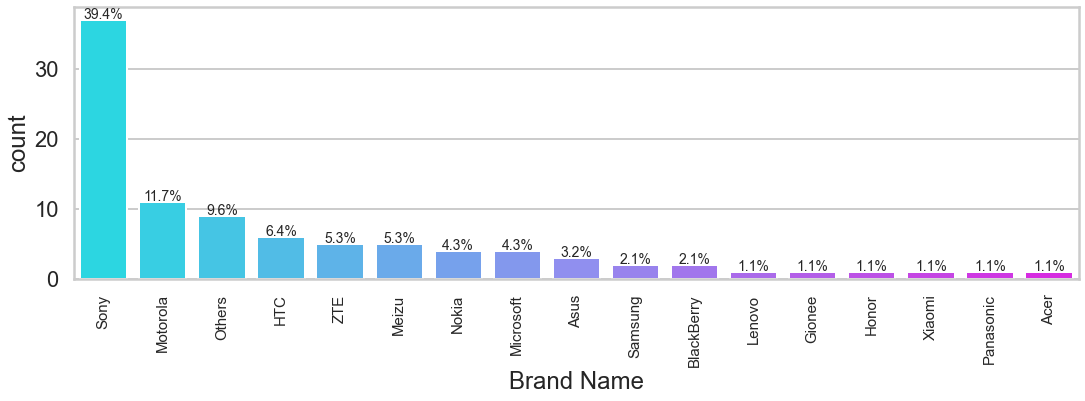

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(df_main_camera,'Brand Name') ## Complete the code to create labeled_barplot for 'brand_name' in high main camera dataframe

**Let's see how the price of used devices varies across the years.**

price           [0.1475676479676773, 0.15282744553158345, 0.13...
Release Year    0    2013
1    2014
2    2015
3    2016
4    2...
dtype: object


Text(0, 0.5, 'rate of change of used price')

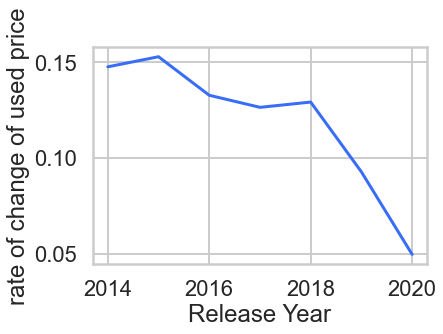

<IPython.core.display.Javascript object>

In [41]:
pct_change =df.groupby(by='Release Year').median()['Normalized Used Price'].reset_index(name='price').apply({'price':lambda x: np.diff(x),'Release Year':lambda y:np.abs(y)})
print(pct_change)

sns.lineplot(x=pct_change['Release Year'][1:],y=pct_change.price)
plt.ylabel('rate of change of used price')


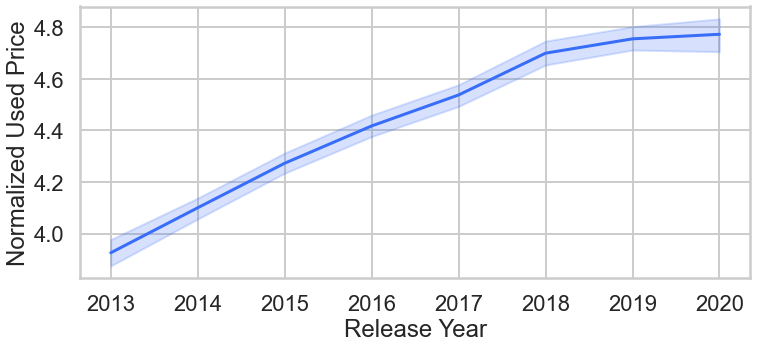

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df,x='Release Year',y='Normalized Used Price') ## Complete the code to create a lineplot for release year and used price
plt.show()

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

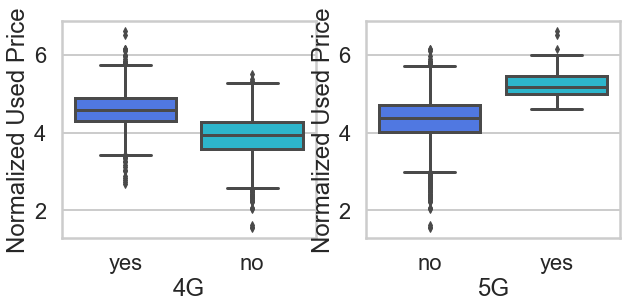

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4G", y="Normalized Used Price")

plt.subplot(122)
sns.boxplot(data=df, x="5G", y="Normalized Used Price")

plt.show()

## Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [44]:
# let's create a copy of the data
df1 = df.copy()

<IPython.core.display.Javascript object>

In [45]:
df1.duplicated().any()

False

<IPython.core.display.Javascript object>

In [46]:
# checking for missing values
df1.isna().sum().sort_values(ascending=False) ## Complete the code to check missing values in all the columns

Main Camera Mp           179
Weight Log                 7
Battery                    6
Ram                        4
Int Memory                 4
Selfie Camera Mp           2
Normalized New Price       0
Normalized Used Price      0
Days Used                  0
Release Year               0
5G                         0
4G                         0
Screen Size                0
Os                         0
Brand Name                 0
dtype: int64

<IPython.core.display.Javascript object>

In [47]:
df1.isna().sum().sort_values(ascending=False)


Main Camera Mp           179
Weight Log                 7
Battery                    6
Ram                        4
Int Memory                 4
Selfie Camera Mp           2
Normalized New Price       0
Normalized Used Price      0
Days Used                  0
Release Year               0
5G                         0
4G                         0
Screen Size                0
Os                         0
Brand Name                 0
dtype: int64

<IPython.core.display.Javascript object>

In [48]:
cols_impute = [
    "Main Camera Mp",
    "Selfie Camera Mp",
    "Int Memory",
    "Ram",
    "Battery",
    
]

for col in cols_impute:
    df1[col] = df1.groupby(by=['Release Year','Brand Name' ])[col].transform(
        lambda x: x.fillna(x.median())
    )   ## Complete the code to impute missing values in cols_impute with median by grouping the data on release year and brand name 

c:\Users\ryass\anaconda3\envs\obspy\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>

In [49]:
df1[cols_impute].isna().sum()

Main Camera Mp      179
Selfie Camera Mp      2
Int Memory            0
Ram                   0
Battery               6
dtype: int64

<IPython.core.display.Javascript object>

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [50]:
cols_impute = [
    "Main Camera Mp",
    "Selfie Camera Mp",
    "Battery",
    "Weight Log",
   ]
for col in cols_impute:
    df1[col] = df1.groupby(by='Brand Name')[col].transform(lambda x:x.fillna(x.median())) ## Complete the code to impute the missing values in cols_impute with median by grouping the data on brand name

<IPython.core.display.Javascript object>

In [51]:
df1[cols_impute].isna().sum()

Main Camera Mp      10
Selfie Camera Mp     0
Battery              0
Weight Log           0
dtype: int64

<IPython.core.display.Javascript object>

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.
- We will re-apply the log-transform to the `weight` column.

In [52]:
df1["Main Camera Mp"] = df1["Main Camera Mp"].fillna(df1["Main Camera Mp"].median()) ## Complete the code to impute the data with median

# re-applying the log-transform to the weight column

# checking for missing values
df1.isna().sum().sort_values(ascending=False) ## Complete the code to check missing values after imputing the above columns

Weight Log               0
Normalized New Price     0
Normalized Used Price    0
Days Used                0
Release Year             0
Battery                  0
Ram                      0
Int Memory               0
Selfie Camera Mp         0
Main Camera Mp           0
5G                       0
4G                       0
Screen Size              0
Os                       0
Brand Name               0
dtype: int64

<IPython.core.display.Javascript object>

### Feature Engineering

- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [53]:
df1["Years Since Release"] = 2021 - df1["Release Year"]
df1.drop("Release Year", axis=1, inplace=True)
df1["Years Since Release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: Years Since Release, dtype: float64

<IPython.core.display.Javascript object>

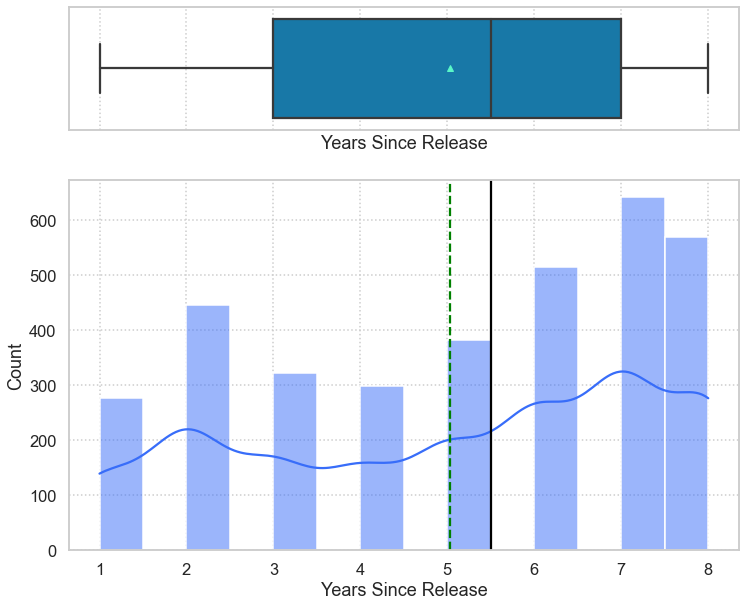

<IPython.core.display.Javascript object>

In [54]:
histogram_boxplot(df1,"Years Since Release")

### Outlier Check

- Let's check for outliers in the data.

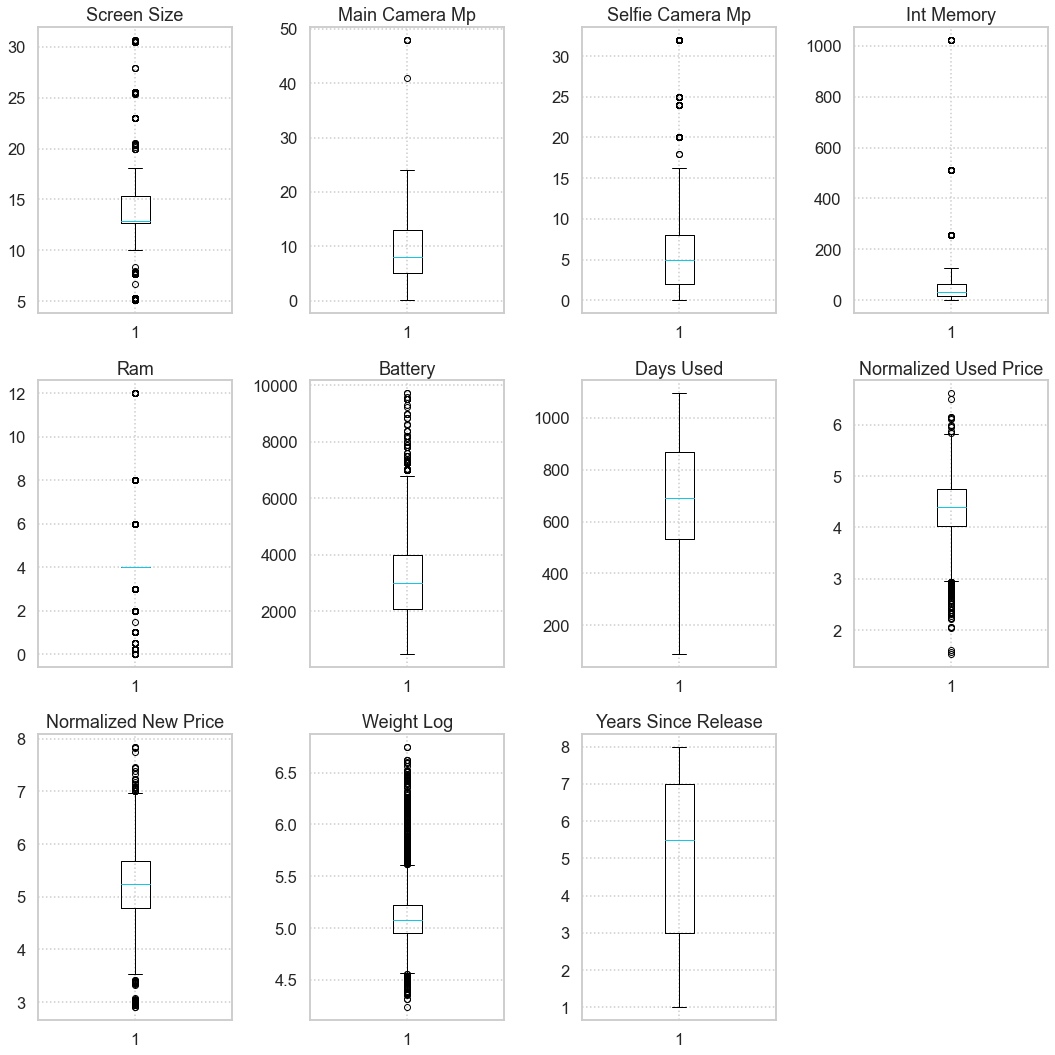

<IPython.core.display.Javascript object>

In [55]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Outlier Treatment (if needed)

In [56]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [57]:
skewd=np.abs(df1.skew())[np.abs(df1.skew())>=2].index.tolist()
skewd

['Int Memory']

<IPython.core.display.Javascript object>

In [58]:
treat_out_cols = [col for col in skewd ] ## Complete the code to specify the columns for which outliers have to be treated
print(treat_out_cols)
df2 = treat_outliers_all(df1,treat_out_cols)


['Int Memory']


<IPython.core.display.Javascript object>

- Let's recheck the boxplots to see if outliers were treated.

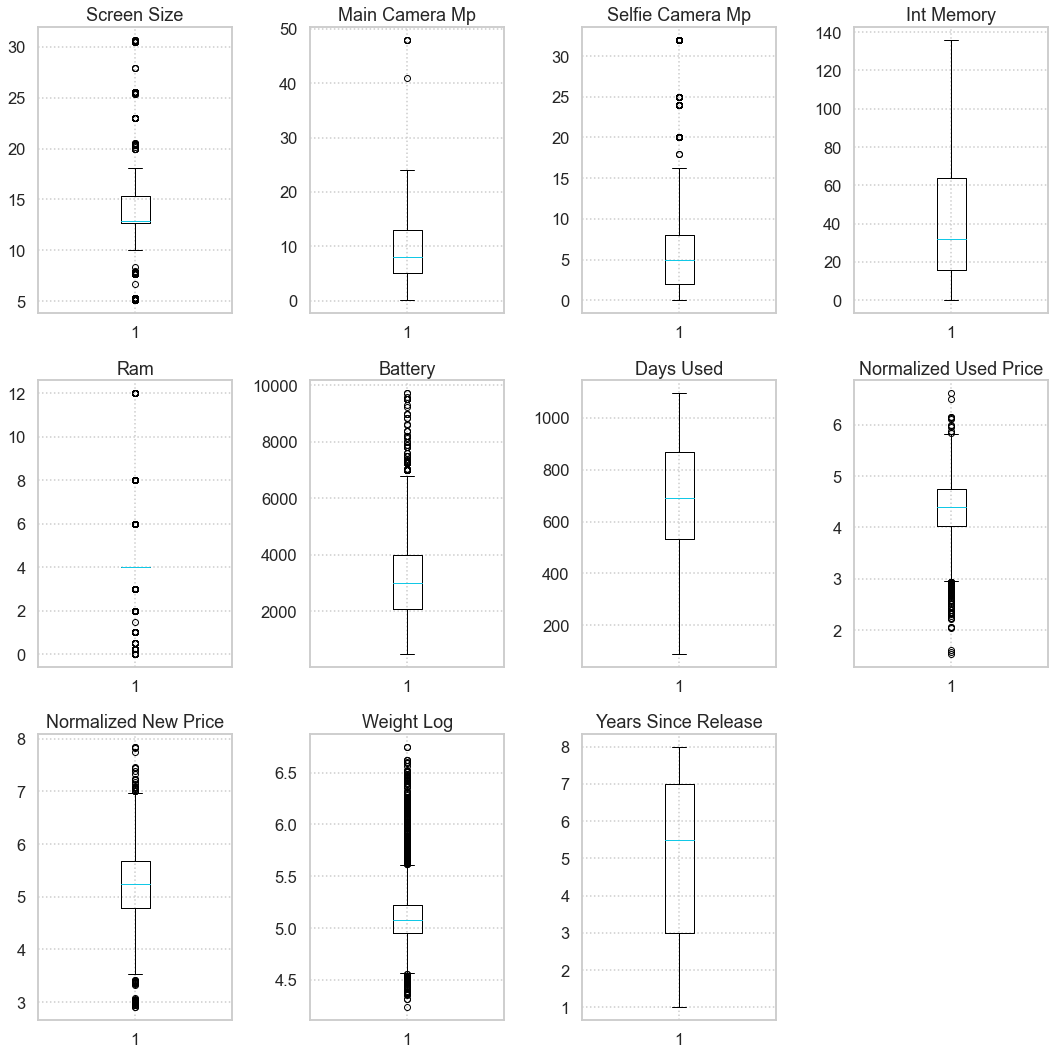

<IPython.core.display.Javascript object>

In [59]:
plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [60]:
# let's check the statistical summary of the data once
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand Name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Screen Size,3454,NaN,NaN,NaN,13.7131,3.80528,5.08,12.7,12.83,15.34,30.71
4G,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5G,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Main Camera Mp,3454,NaN,NaN,NaN,9.6176,4.74944,0.08,5,8,13,48
Selfie Camera Mp,3454,NaN,NaN,NaN,6.55507,6.96844,0,2,5,8,32
Int Memory,3454,NaN,NaN,NaN,44.6941,39.08,0.01,16,32,64,136
Ram,3454,NaN,NaN,NaN,4.03262,1.3686,0.02,4,4,4,12
Battery,3454,NaN,NaN,NaN,3132.58,1298.88,500,2100,3000,4000,9720


<IPython.core.display.Javascript object>

### Data Preparation for modeling

- We want to predict the normalized price of used devices.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [61]:
## Complete the code to define the dependent and independent variables
X = df2.drop('Normalized Used Price',axis=1)
y = df2['Normalized Used Price']

print(X.head())
print()
print(y.head())

  Brand Name       Os  Screen Size   4G   5G  Main Camera Mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   Selfie Camera Mp  Int Memory  Ram  Battery  Days Used  \
0               5.0        64.0  3.0   3020.0        127   
1              16.0       128.0  8.0   4300.0        325   
2               8.0       128.0  8.0   4200.0        162   
3               8.0        64.0  6.0   7250.0        345   
4               8.0        64.0  3.0   5000.0        293   

   Normalized New Price  Weight Log  Years Since Release  
0              4.715100    4.983607                    1  
1              5.519018    5.361292                    1  
2              5.884631    5.361292                    1  
3              5.6

<IPython.core.display.Javascript object>

In [62]:
X_num=X.select_dtypes('number')
X_obj=X.select_dtypes(exclude='number')

<IPython.core.display.Javascript object>

In [63]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()
X1=scaler.fit_transform(X_num)
X1=pd.DataFrame(X1,columns=X_num.columns.tolist())
X=pd.concat([X1,X_obj],axis=1)

<IPython.core.display.Javascript object>

In [64]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for independent features

X.head()

,Screen Size,Main Camera Mp,Selfie Camera Mp,Int Memory,Ram,Battery,Days Used,Normalized New Price,Weight Log,Years Since Release,...,Brand Name_Spice,Brand Name_Vivo,Brand Name_XOLO,Brand Name_Xiaomi,Brand Name_ZTE,Os_Others,Os_Windows,Os_iOS,4G_yes,5G_yes
0,0.367538,0.269616,0.15625,0.470549,0.248748,0.273319,0.035892,0.366665,0.297776,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.476785,0.269616,0.50000,0.941172,0.666110,0.412148,0.233300,0.529190,0.447830,0.0,...,0,0,0,0,0,0,0,0,1,1
2,0.452985,0.269616,0.25000,0.941172,0.666110,0.401302,0.070788,0.603105,0.447830,0.0,...,0,0,0,0,0,0,0,0,1,1
3,0.796723,0.269616,0.25000,0.470549,0.499165,0.732104,0.253240,0.551821,0.770633,0.0,...,0,0,0,0,0,0,0,0,1,1
4,0.399532,0.269616,0.25000,0.470549,0.248748,0.488069,0.201396,0.413717,0.391836,0.0,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [65]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1) ## Complete the code to split the data into train and test in specified ratio

<IPython.core.display.Javascript object>

In [66]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

## Linear Regression using statsmodels

- Let's build a linear regression model using statsmodels.

In [67]:
# adding constant to the train data
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test) ## Complete the code to add contant to the test data

olsmodel1 = sm.OLS(y_train,x_train1).fit()
 ## Complete the code to fit OLS model
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     Normalized Used Price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     274.0
Date:                   Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                           17:33:00   Log-Likelihood:                 143.67
No. Observations:                   2417   AIC:                            -189.3
Df Residuals:                       2368   BIC:                             94.38
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [68]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [69]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train1, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.228006,0.177822,0.847409,0.84425,4.266876


<IPython.core.display.Javascript object>

In [70]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test1, y_test) ## Complete the code to check the performance on test data
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236883,0.183369,0.844423,0.836699,4.461555


<IPython.core.display.Javascript object>

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [72]:
x_train1_num=x_train1.select_dtypes(exclude=['uint8','object','category'])


<IPython.core.display.Javascript object>

In [73]:
checking_vif(x_train1_num)  ## Complete the code to check VIF on train data

,feature,VIF
0,const,36.948441
1,Screen Size,6.056534
2,Main Camera Mp,1.775606
3,Selfie Camera Mp,2.801195
4,Int Memory,2.035622
5,Ram,1.557964
6,Battery,3.733588
7,Days Used,2.504384
8,Normalized New Price,2.370336
9,Weight Log,5.620677


<IPython.core.display.Javascript object>

### Removing Multicollinearity (if needed)

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [74]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [75]:
col_list = [feature  for feature,vif in checking_vif(x_train1.select_dtypes(exclude=['uint8','object','category'])).values if vif >=5] ## Complete the code to specify the columns with high VIF
print(col_list)
res = treating_multicollinearity(x_train1, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

['const', 'Screen Size', 'Weight Log']


,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,const,0.994512,0.326443
1,Screen Size,0.841602,0.232353
2,Weight Log,0.838272,0.234782


<IPython.core.display.Javascript object>

In [76]:
col_to_drop = 'Screen Size' ## Complete the code to specify the column to drop
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)] ## Complete the code to specify the train data from which to drop the column specified
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)] ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2.select_dtypes(exclude=['uint8','object','category']))
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  Screen Size


,feature,VIF
0,const,36.944124
1,Main Camera Mp,1.771038
2,Selfie Camera Mp,2.798550
3,Int Memory,2.025350
4,Ram,1.554567
5,Battery,3.472224
6,Days Used,2.502385
7,Normalized New Price,2.342922
8,Weight Log,2.865261
9,Years Since Release,3.684070


<IPython.core.display.Javascript object>

### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [77]:
# initial list of columns
cols = x_train2.columns.tolist()   ## Complete the code to check for p-values on the right dataset

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]   ## Complete the code to check for p-values on the right dataset

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'Main Camera Mp', 'Selfie Camera Mp', 'Int Memory', 'Ram', 'Normalized New Price', 'Weight Log', 'Years Since Release', 'Brand Name_Karbonn', 'Brand Name_Lenovo', 'Brand Name_Nokia', 'Brand Name_Panasonic', 'Brand Name_Xiaomi', 'Os_Others', '4G_yes', '5G_yes']


<IPython.core.display.Javascript object>

In [78]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

<IPython.core.display.Javascript object>

In [79]:
olsmodel2 = sm.OLS(y_train,x_train3).fit() ## Complete the code fit OLS() on updated dataset (no multicollinearity and no insignificant predictors)
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     Normalized Used Price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     856.0
Date:                   Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                           17:33:04   Log-Likelihood:                 105.10
No. Observations:                   2417   AIC:                            -178.2
Df Residuals:                       2401   BIC:                            -85.55
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [80]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2,x_train3,y_train) ## Complete the code to check performance on train data
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231675,0.180221,0.84246,0.84141,4.334658


<IPython.core.display.Javascript object>

In [81]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test) ## Complete the code to check performance on test data
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240235,0.186445,0.839989,0.837479,4.543631


<IPython.core.display.Javascript object>

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [82]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.817842,0.269645
1525,4.448399,4.685805,-0.237406
1128,4.315353,4.294321,0.021031
3003,4.282068,4.136374,0.145694
2907,4.456438,4.469466,-0.013028


<IPython.core.display.Javascript object>

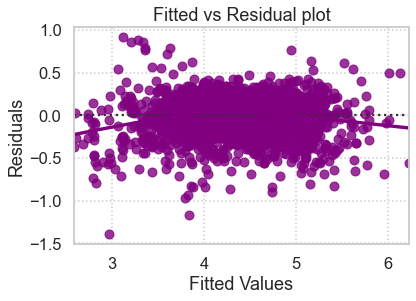

<IPython.core.display.Javascript object>

In [83]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

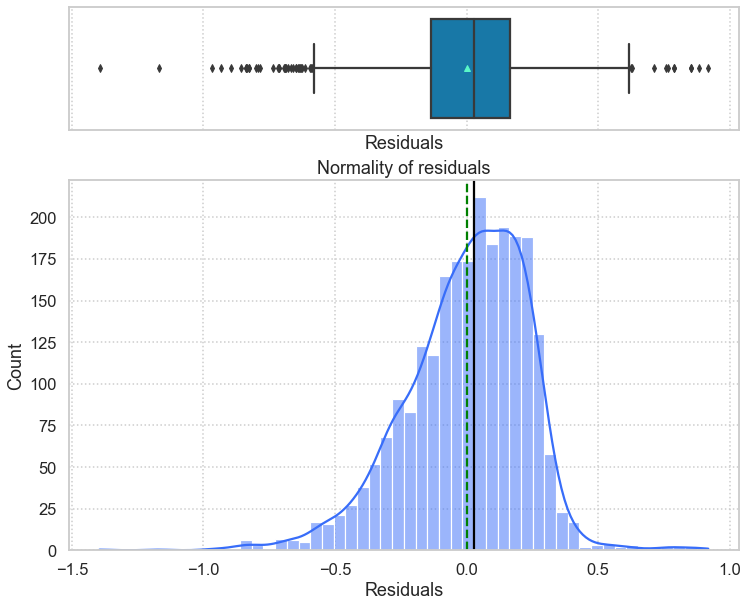

<IPython.core.display.Javascript object>

In [84]:
histogram_boxplot(df_pred,'Residuals') ## Complete the code to plot the distribution of residuals
plt.title("Normality of residuals")
plt.show()

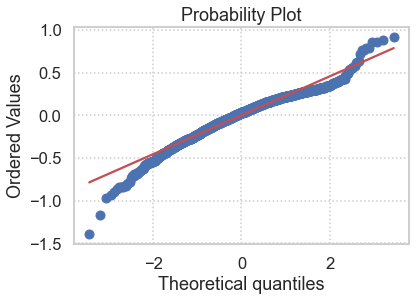

<IPython.core.display.Javascript object>

In [85]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred['Residuals'], dist="norm", plot=pylab) ## Complete the code check Q-Q plot
plt.show()

In [86]:
stats.shapiro(df_pred['Residuals'].values) ## Complete the code to apply the Shapiro-Wilks test

ShapiroResult(statistic=0.967007040977478, pvalue=4.091745469190125e-23)

<IPython.core.display.Javascript object>

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [87]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred['Residuals'].values,olsmodel2.model.exog) ## Complete the code to apply the Goldfeldquandt test
lzip(name, test)

[('F statistic', 1.0492009131443125), ('p-value', 0.2035303265695584)]

<IPython.core.display.Javascript object>

## Final Model Summary

In [88]:
olsmodel_final = sm.OLS(y_train,x_train3).fit() ## Complete the code to fit the final model
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     Normalized Used Price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     856.0
Date:                   Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                           17:33:11   Log-Likelihood:                 105.10
No. Observations:                   2417   AIC:                            -178.2
Df Residuals:                       2401   BIC:                            -85.55
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [89]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final,x_train3,y_train) ## Complete the code to check the performance on train data
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231675,0.180221,0.84246,0.84141,4.334658


<IPython.core.display.Javascript object>

In [90]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final,x_test3,y_test) ## Complete the code to check performance on test data
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240235,0.186445,0.839989,0.837479,4.543631


<IPython.core.display.Javascript object>

In [91]:
df_olsmodel_final = pd.read_html(olsmodel_final.summary().tables[1].as_html(),header=0,index_col=0)[0]

<IPython.core.display.Javascript object>

In [92]:
df_olsmodel_final.sort_values(by='coef',ascending=False)

,coef,std err,t,P>|t|,[0.025,0.975]
const,2.6387,0.032,81.447,0.000,2.575,2.702
Normalized New Price,2.0843,0.056,37.345,0.000,1.975,2.194
Weight Log,1.1354,0.040,28.391,0.000,1.057,1.214
Main Camera Mp,1.0200,0.067,15.290,0.000,0.889,1.151
Selfie Camera Mp,0.4306,0.036,11.981,0.000,0.360,0.501
Ram,0.2486,0.060,4.157,0.000,0.131,0.366
Brand Name_Karbonn,0.1361,0.054,2.505,0.012,0.030,0.243
Brand Name_Nokia,0.0982,0.031,3.154,0.002,0.037,0.159
Brand Name_Xiaomi,0.0781,0.026,3.062,0.002,0.028,0.128
Brand Name_Panasonic,0.0769,0.039,1.984,0.047,0.001,0.153


<IPython.core.display.Javascript object>

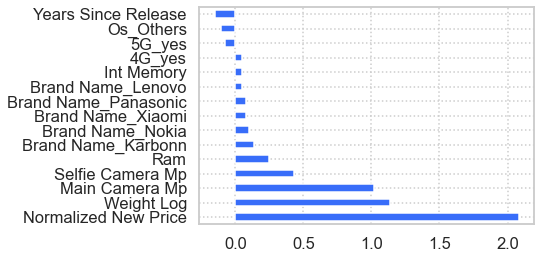

<IPython.core.display.Javascript object>

In [93]:
df_olsmodel_final['coef'][1:].sort_values(ascending=False).plot.barh()



##  Actionable Insights and Recommendations

the most importatnt feature is new price. 
Lenovo, Nokia and Xiamo in high demand 
days of used and interl memoires is less important features. 


In [94]:
from sklearn.linear_model  import Lasso
from sklearn.pipeline  import make_pipeline 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV 
from sklearn.feature_selection import SelectKBest,f_regression

<IPython.core.display.Javascript object>

In [95]:
X = df2.drop('Normalized Used Price',axis=1)
y = df2['Normalized Used Price']
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for independent features

X.head()
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

<IPython.core.display.Javascript object>

In [128]:
pipe=make_pipeline(StandardScaler(),Lasso(random_state=1))
params={'lasso__alpha': [0.00001,0.001,0.01,1,2,3]}
gs=GridSearchCV(pipe,params,cv=5)
#fitting gs to training data
gs.fit(x_train, y_train)

gs.best_params_

{'lasso__alpha': 0.001}

<IPython.core.display.Javascript object>

In [111]:
gs.n_splits_

3

<IPython.core.display.Javascript object>

In [129]:
df_cv_scores=pd.DataFrame(gs.cv_results_).sort_values(by='rank_test_score')
#selecting specific columns to create a view
df_cv_scores[['params','split0_test_score', 'split1_test_score', 'split2_test_score',\
        'mean_test_score',\
       'std_test_score', 'rank_test_score']].head()

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,{'lasso__alpha': 0.001},0.844618,0.826125,0.841364,0.839433,0.006889,1
2,{'lasso__alpha': 0.01},0.843130,0.830879,0.839125,0.839157,0.004379,2
0,{'lasso__alpha': 1e-05},0.843583,0.824151,0.841579,0.838669,0.007431,3
3,{'lasso__alpha': 1},-0.000028,-0.007621,-0.000553,-0.002847,0.002697,4
4,{'lasso__alpha': 2},-0.000028,-0.007621,-0.000553,-0.002847,0.002697,4


<IPython.core.display.Javascript object>

In [135]:

result_train=model_performance_regression(gs,x_train, y_train)
result_test=model_performance_regression(gs,x_test, y_test)
print(result_train)
print(result_test)
print(gs.best_estimator_)


       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.228177  0.178137   0.847181        0.844084  4.277182
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.236425  0.182996   0.845023        0.837494  4.457161
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.001, random_state=1))])


<IPython.core.display.Javascript object>

In [181]:
features=pd.DataFrame(gs.best_estimator_.named_steps['lasso'].coef_.tolist(),index=gs.feature_names_in_.tolist())

<IPython.core.display.Javascript object>

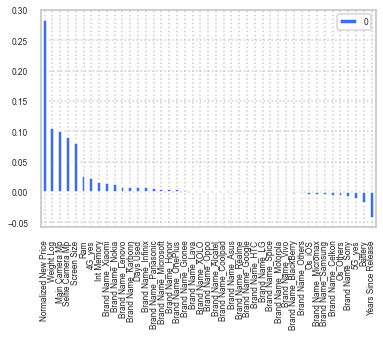

<IPython.core.display.Javascript object>

In [204]:
sns.set_context("talk", font_scale=0.5)#poster
features.sort_values(by=0,ascending=False)[features.sort_values(by=0,ascending=False)!=0].dropna().plot.bar()